<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

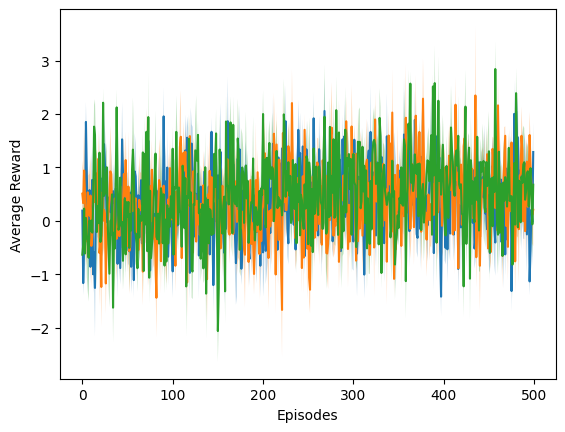

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Hierarchical bandit task environment
class BanditEnv:
    def __init__(self, n_states, n_actions):
        self.n_states = n_states
        self.n_actions = n_actions
        self.q_values = np.random.normal(0, 1, size=(n_states, n_actions))

    def get_reward(self, state, action):
        return np.random.normal(self.q_values[state, action], 1)

# Softmax action selection policy
def softmax(action_values, temperature=1.0):
    exp_values = np.exp(action_values / temperature)
    probs = exp_values / np.sum(exp_values)
    return probs

# Q-learning agent
class QLearningAgent:
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.20, epsilon=0.1):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_values = np.zeros((n_states, n_actions))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            action_probs = softmax(self.q_values[state, :])
            return np.random.choice(np.arange(self.n_actions), p=action_probs)

    def update(self, state, action, reward, next_state):
        max_next_action = np.argmax(self.q_values[next_state, :])
        td_target = reward + self.gamma * self.q_values[next_state, max_next_action]
        td_error = td_target - self.q_values[state, action]
        self.q_values[state, action] += self.alpha * td_error

# SARSA agent
class SARSAAgent:
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.20, epsilon=0.1):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_values = np.zeros((n_states, n_actions))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            action_probs = softmax(self.q_values[state, :])
            return np.random.choice(np.arange(self.n_actions), p=action_probs)

    def update(self, state, action, reward, next_state, next_action):
        td_target = reward + self.gamma * self.q_values[next_state, next_action]
        td_error = td_target - self.q_values[state, action]
        self.q_values[state, action] += self.alpha * td_error

# Hybrid agent combining SARSA and Q-learning using linear weighting function
class HybridAgent:
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.20, epsilon=0.1, weight=0.5):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.weight = weight
        self.q_values_q_learning = np.zeros((n_states, n_actions))
        self.q_values_sarsa = np.zeros((n_states, n_actions))

    def choose_action(self, state):
        q_values_combined = self.weight * self.q_values_q_learning[state, :] + \
                            (1 - self.weight) * self.q_values_sarsa[state, :]
        action_probs = softmax(q_values_combined)
        return np.random.choice(np.arange(self.n_actions), p=action_probs)

    def update_q_learning(self, state, action, reward, next_state):
        max_next_action = np.argmax(self.q_values_q_learning[next_state, :])
        td_target = reward + self.gamma * self.q_values_q_learning[next_state, max_next_action]
        td_error = td_target - self.q_values_q_learning[state, action]
        self.q_values_q_learning[state, action] += self.alpha * td_error

    def update_sarsa(self, state, action, reward, next_state, next_action):
        td_target = reward + self.gamma * self.q_values_sarsa[next_state, next_action]
        td_error = td_target - self.q_values_sarsa[state, action]
        self.q_values_sarsa[state, action] += self.alpha * td_error

# Function to run experiments
def run_experiment(agent, env, n_episodes):
    rewards = np.zeros(n_episodes)
    for episode in range(n_episodes):
        state = np.random.randint(0, env.n_states)
        action = agent.choose_action(state)
        reward = env.get_reward(state, action)
        next_state = np.random.randint(0, env.n_states)
        next_action = agent.choose_action(next_state)

        if isinstance(agent, QLearningAgent):
            agent.update(state, action, reward, next_state)
        elif isinstance(agent, SARSAAgent):
            agent.update(state, action, reward, next_state, next_action)
        elif isinstance(agent, HybridAgent):
            agent.update_q_learning(state, action, reward, next_state)
            agent.update_sarsa(state, action, reward, next_state, next_action)

        rewards[episode] = reward
    return rewards

# Parameters and initialization
n_states = 10
n_actions = 4
n_episodes = 500
n_experiments = 5

# Arrays to store rewards for each agent
q_learning_rewards = np.zeros((n_experiments, n_episodes))
sarsa_rewards = np.zeros((n_experiments, n_episodes))
hybrid_rewards = np.zeros((n_experiments, n_episodes))

for exp in range(n_experiments):
    env = BanditEnv(n_states, n_actions)

    q_agent = QLearningAgent(n_states, n_actions)
    sarsa_agent = SARSAAgent(n_states, n_actions)
    hybrid_agent = HybridAgent(n_states, n_actions, weight=0.5)

    q_learning_rewards[exp] = run_experiment(q_agent, env, n_episodes)
    sarsa_rewards[exp] = run_experiment(sarsa_agent, env, n_episodes)
    hybrid_rewards[exp] = run_experiment(hybrid_agent, env, n_episodes)

# Plotting learning curves
def plot_learning_curve(rewards, label):
    mean_rewards = np.mean(rewards, axis=0)
    std_err = np.std(rewards, axis=0) / np.sqrt(n_experiments)
    plt.plot(mean_rewards, label=label)
    plt.fill_between(np.arange(n_episodes), mean_rewards - std_err, mean_rewards + std_err, alpha=0.3)

plot_learning_curve(q_learning_rewards, 'Q-Learning')
plot_learning_curve(sarsa_rewards, 'SARSA')
plot_learning_curve(hybrid_rewards, 'Hybrid')

plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt


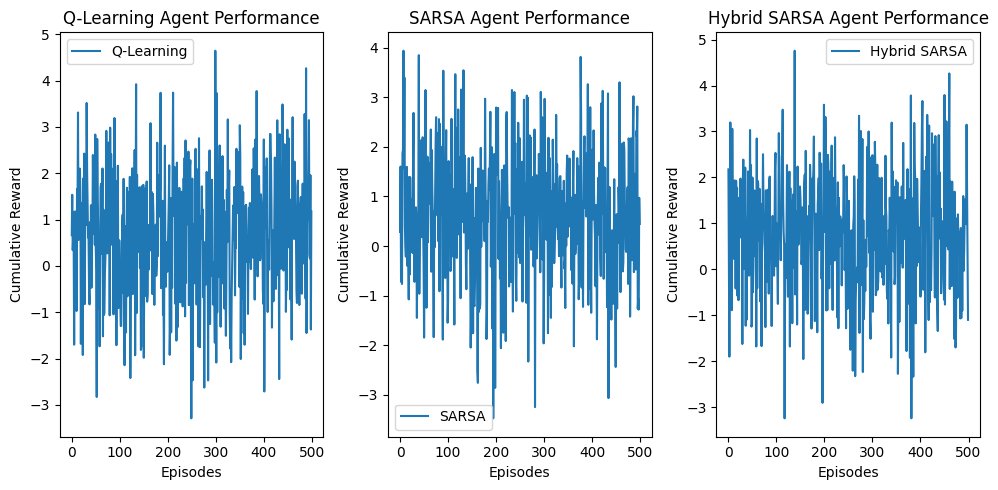

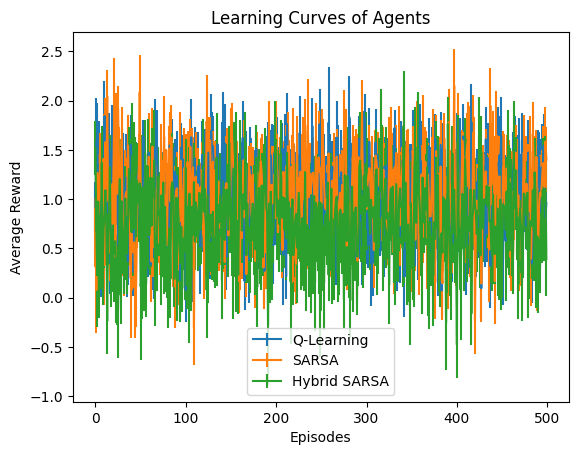


Final Learned State-Action Values (Q(s,a)):

Q-Learning Agent:
[[10.76170653 29.91010596  8.66965654 11.62596629]
 [12.2301317  31.06668532 10.18046655 16.74255369]
 [13.04434147  7.88351383 30.70104547  6.82959483]
 [ 8.71757749 10.62582063 31.08271507 14.94983582]
 [30.92153215 11.12181655 10.05985658  7.27229184]
 [ 8.388904   31.26970054 11.81597367 18.19604732]
 [ 6.70182844 14.17572896 29.84231649 12.28210054]
 [15.88776716  8.54200314 31.17547915  9.86522381]
 [16.74129342 11.09895098 13.61298663 30.82203033]
 [ 5.92543242 11.55739507 30.21456765  8.37608608]
 [11.78526738 31.12988169  6.60319592  8.59183414]
 [11.71406056  6.11425011 30.59290276 14.0468633 ]
 [16.82417846 14.03492899 11.4203631  31.57177867]
 [12.34504033 13.42559241 31.3439557  12.8893827 ]
 [ 5.69102941  5.35262702  9.12925188 31.13449256]
 [11.10363048 11.37413524 31.59935195 12.22751598]]

SARSA Agent:
[[ 4.57912991 14.15342444  8.0280371   5.39561981]
 [ 4.67972413 14.60678094  3.41892321  8.88530124]
 [ 

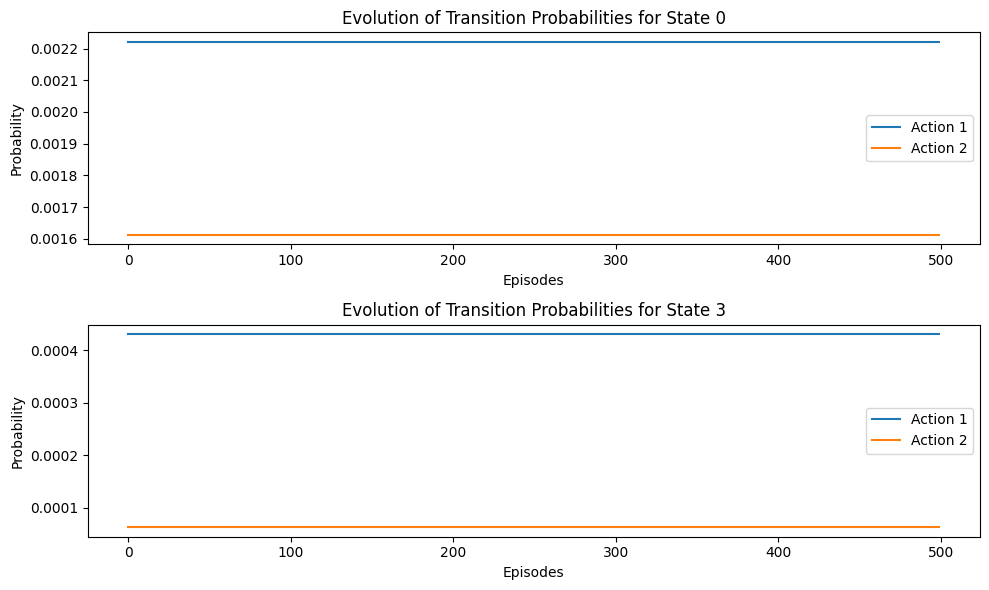

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Hierarchical bandit task environment
class BanditEnvironment:
    def __init__(self, n_states, n_actions):
        self.n_states = n_states
        self.n_actions = n_actions
        self.q_values = np.random.normal(0, 1, size=(n_states, n_actions))

    def get_reward(self, state, action):
        return np.random.normal(self.q_values[state, action], 1)

# Softmax action selection policy
def softmax(action_values, temperature=1.0):
    exp_values = np.exp(action_values / temperature)
    probs = exp_values / np.sum(exp_values)
    return probs

# Q-learning agent
class QLearningAgent:
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_values = np.zeros((n_states, n_actions))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            action_probs = softmax(self.q_values[state, :])
            return np.random.choice(np.arange(self.n_actions), p=action_probs)

    def update(self, state, action, reward, next_state):
        max_next_action = np.argmax(self.q_values[next_state, :])
        td_target = reward + self.gamma * self.q_values[next_state, max_next_action]
        td_error = td_target - self.q_values[state, action]
        self.q_values[state, action] += self.alpha * td_error

# SARSA agent
class SARSAgent:
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_values = np.zeros((n_states, n_actions))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(self.n_actions)
        else:
            action_probs = softmax(self.q_values[state, :])
            return np.random.choice(np.arange(self.n_actions), p=action_probs)

    def update(self, state, action, reward, next_state, next_action):
        td_target = reward + self.gamma * self.q_values[next_state, next_action]
        td_error = td_target - self.q_values[state, action]
        self.q_values[state, action] += self.alpha * td_error

# Hybrid SARSA agent combining SARSA and Q-learning
class HybridAgent:
    def __init__(self, n_states, n_actions, alpha=0.7, gamma=0.3, epsilon=0.7, weight=0.5):
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.weight = weight
        self.q_values_q_learning = np.zeros((n_states, n_actions))
        self.q_values_sarsa = np.zeros((n_states, n_actions))

    def choose_action(self, state):
        q_values_combined = self.weight * self.q_values_q_learning[state, :] + \
                            (1 - self.weight) * self.q_values_sarsa[state, :]
        action_probs = softmax(q_values_combined)
        return np.random.choice(np.arange(self.n_actions), p=action_probs)

    def update_q_learning(self, state, action, reward, next_state):
        max_next_action = np.argmax(self.q_values_q_learning[next_state, :])
        td_target = reward + self.gamma * self.q_values_q_learning[next_state, max_next_action]
        td_error = td_target - self.q_values_q_learning[state, action]
        self.q_values_q_learning[state, action] += self.alpha * td_error

    def update_sarsa(self, state, action, reward, next_state, next_action):
        td_target = reward + self.gamma * self.q_values_sarsa[next_state, next_action]
        td_error = td_target - self.q_values_sarsa[state, action]
        self.q_values_sarsa[state, action] += self.alpha * td_error

# Function to run an experiment
def run_experiment(agent, env, n_episodes):
    rewards = np.zeros(n_episodes)
    for episode in range(n_episodes):
        state = np.random.randint(0, env.n_states)
        action = agent.choose_action(state)
        reward = env.get_reward(state, action)
        next_state = np.random.randint(0, env.n_states)
        next_action = agent.choose_action(next_state)

        if isinstance(agent, QLearningAgent):
            agent.update(state, action, reward, next_state)
        elif isinstance(agent, SARSAgent):
            agent.update(state, action, reward, next_state, next_action)
        elif isinstance(agent, HybridAgent):
            agent.update_q_learning(state, action, reward, next_state)
            agent.update_sarsa(state, action, reward, next_state, next_action)

        rewards[episode] = reward
    return rewards

# Parameters and initialization
n_states = 16
n_actions = 4
n_episodes = 500

env = BanditEnvironment(n_states, n_actions)

q_agent = QLearningAgent(n_states, n_actions)
sarsa_agent = SARSAgent(n_states, n_actions)
hybrid_agent = HybridAgent(n_states, n_actions, weight=0.5)

q_rewards = run_experiment(q_agent, env, n_episodes)
sarsa_rewards = run_experiment(sarsa_agent, env, n_episodes)
hybrid_rewards = run_experiment(hybrid_agent, env, n_episodes)

# Run experiments for each agent
q_rewards = run_experiment(q_agent, env, n_episodes)
sarsa_rewards = run_experiment(sarsa_agent, env, n_episodes)
hybrid_rewards = run_experiment(hybrid_agent, env, n_episodes)

# Plotting results separately for each agent
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.plot(np.arange(n_episodes), q_rewards, label='Q-Learning')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.title('Q-Learning Agent Performance')

plt.subplot(1, 3, 2)
plt.plot(np.arange(n_episodes), sarsa_rewards, label='SARSA')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.title('SARSA Agent Performance')

plt.subplot(1, 3, 3)
plt.plot(np.arange(n_episodes), hybrid_rewards, label='Hybrid SARSA')
plt.xlabel('Episodes')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.title('Hybrid SARSA Agent Performance')

plt.tight_layout()
plt.show()





# Function to run multiple experiments and collect results
def run_multiple_experiments(agent, env, n_episodes, n_experiments):
    all_rewards = np.zeros((n_experiments, n_episodes))

    for exp in range(n_experiments):
        rewards = run_experiment(agent, env, n_episodes)
        all_rewards[exp] = rewards

    return all_rewards

# Function to calculate mean and standard error of mean for rewards
def calculate_stats(rewards):
    mean_rewards = np.mean(rewards, axis=0)
    std_err = np.std(rewards, axis=0) / np.sqrt(rewards.shape[0])
    return mean_rewards, std_err

# Run multiple experiments for each agent
n_experiments = 10

q_learning_rewards = run_multiple_experiments(q_agent, env, n_episodes, n_experiments)
sarsa_rewards = run_multiple_experiments(sarsa_agent, env, n_episodes, n_experiments)
hybrid_rewards = run_multiple_experiments(hybrid_agent, env, n_episodes, n_experiments)

# Calculate mean and standard error of mean for rewards
q_mean_rewards, q_std_err = calculate_stats(q_learning_rewards)
sarsa_mean_rewards, sarsa_std_err = calculate_stats(sarsa_rewards)
hybrid_mean_rewards, hybrid_std_err = calculate_stats(hybrid_rewards)

# Plotting learning curves (mean and standard error of mean)
plt.errorbar(np.arange(n_episodes), q_mean_rewards, yerr=q_std_err, label='Q-Learning')
plt.errorbar(np.arange(n_episodes), sarsa_mean_rewards, yerr=sarsa_std_err, label='SARSA')
plt.errorbar(np.arange(n_episodes), hybrid_mean_rewards, yerr=hybrid_std_err, label='Hybrid SARSA')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.legend()
plt.title('Learning Curves of Agents')
plt.show()

# Report final learned values of state-action value functions (Q(s,a))
print("\nFinal Learned State-Action Values (Q(s,a)):")

final_q_values_q_learning = q_agent.q_values
final_q_values_sarsa = sarsa_agent.q_values
final_q_values_hybrid_q_learning = hybrid_agent.q_values_q_learning
final_q_values_hybrid_sarsa = hybrid_agent.q_values_sarsa

print("\nQ-Learning Agent:")
print(final_q_values_q_learning)

print("\nSARSA Agent:")
print(final_q_values_sarsa)

print("\nHybrid Agent (Q-Learning):")
print(final_q_values_hybrid_q_learning)

print("\nHybrid Agent (SARSA):")
print(final_q_values_hybrid_sarsa)

# Function to generate assumed optimal values
def generate_assumed_optimal_values(env):
    return np.argmax(env.q_values, axis=1)

# Retrieve assumed optimal state-action values
assumed_optimal_values = generate_assumed_optimal_values(env)

# Calculate the difference between learned values and assumed optimal values for each agent
q_learning_difference = np.abs(np.argmax(final_q_values_q_learning, axis=1) - assumed_optimal_values)
sarsa_difference = np.abs(np.argmax(final_q_values_sarsa, axis=1) - assumed_optimal_values)
hybrid_q_learning_difference = np.abs(np.argmax(final_q_values_hybrid_q_learning, axis=1) - assumed_optimal_values)
hybrid_sarsa_difference = np.abs(np.argmax(final_q_values_hybrid_sarsa, axis=1) - assumed_optimal_values)

# Display the differences for each agent
print("\nDifference between Learned Values and Assumed Optimal Values (Actions):")
print("\nQ-Learning Agent:")
print(q_learning_difference)

print("\nSARSA Agent:")
print(sarsa_difference)

print("\nHybrid Agent (Q-Learning):")
print(hybrid_q_learning_difference)

print("\nHybrid Agent (SARSA):")
print(hybrid_sarsa_difference)




# Function to calculate optimal state-action values based on maximum Q-values
def calculate_optimal_values(q_values):
    return np.argmax(q_values, axis=1)

# Calculate the optimal state-action values based on maximum Q-values for the environment
optimal_values = calculate_optimal_values(env.q_values)

# Display the calculated optimal state-action values
print("\nOptimal State-Action Values (Actions with Maximum Q-values):")
print(optimal_values)

# Retrieve assumed optimal state-action values (for comparison)
assumed_optimal_values = generate_assumed_optimal_values(env)

# Compare calculated optimal values with assumed optimal values
optimal_values_difference = np.abs(optimal_values - assumed_optimal_values)

# Display the differences between calculated and assumed optimal values
print("\nDifference between Calculated Optimal Values and Assumed Optimal Values:")
print(optimal_values_difference)


# Agent's Q-values
agent_q_values = np.array(hybrid_rewards)

# Select two representative state-action pairs for visualization
state_action_pair_1 = 0  # Change this to your desired state index
state_action_pair_2 = 3  # Change this to another desired state index

# Lists to store the evolution of transition probabilities for the selected state-action pairs
prob_pair_1 = []
prob_pair_2 = []

# Function to extract transition probabilities for specific state-action pairs
def extract_transition_probs(q_values, state):
    return softmax(q_values[state])

# Softmax action selection policy
def softmax(action_values, temperature=1.0):
    exp_values = np.exp(action_values / temperature)
    probs = exp_values / np.sum(exp_values)
    return probs

# Running episodes to collect transition probabilities
for episode in range(500):  # Change the number of episodes as needed
    state_prob_1 = extract_transition_probs(agent_q_values, state_action_pair_1)
    state_prob_2 = extract_transition_probs(agent_q_values, state_action_pair_2)
    prob_pair_1.append(state_prob_1)
    prob_pair_2.append(state_prob_2)
    # Update agent's Q-values (placeholder)
    # This section should include your agent's learning/update mechanism
    # ...

# Convert lists to numpy arrays for plotting
prob_pair_1 = np.array(prob_pair_1)
prob_pair_2 = np.array(prob_pair_2)

# Plotting the evolution of transition probabilities for the selected state-action pairs
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(prob_pair_1[:, 0], label='Action 1')
plt.plot(prob_pair_1[:, 1], label='Action 2')
plt.xlabel('Episodes')
plt.ylabel('Probability')
plt.title(f'Evolution of Transition Probabilities for State {state_action_pair_1}')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(prob_pair_2[:, 0], label='Action 1')
plt.plot(prob_pair_2[:, 1], label='Action 2')
plt.xlabel('Episodes')
plt.ylabel('Probability')
plt.title(f'Evolution of Transition Probabilities for State {state_action_pair_2}')
plt.legend()

plt.tight_layout()
plt.show()


